In [29]:
import os
import warnings
warnings.simplefilter("ignore", UserWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.signal as ss
import numpy as np

In [ ]:
# Directories and files
DATA_DIR = "../../data/combined/"

TEST_NUMBER = "test1"
FILE_PEARSON = "volume_pearson_{}.csv".format(TEST_NUMBER)
FILE_NCC = "volume_ncc_{}.csv".format(TEST_NUMBER)
FILE_PCT = "volume_pct_{}.csv".format(TEST_NUMBER)


In [30]:
# Load Data File List
file_list = os.listdir(DATA_DIR)
noisy = ['000050','000180','001070', '001800', '001940', '002220', '002410', '002840', '002870', '002900', '003080', '003090', '003410',
         '003610', '003850', '004410', '004990', '005300', '005720', '005740', '005930', '010100', '010660', '012030', '013360', '013520',
          '013700', '014280', '014530', '017810', '018880', '023450', '027410', '035420', '044450', '095570', '104700', '107590', '138250',
          '144620', '161000', '204320', '284740']

file_list = [f for f in file_list if f[:-4] not in noisy]
codes_list = [f[:-4] for f in file_list if f[:-4] not in noisy]

In [31]:
print(len(codes_list))

743


## 1. Calculate Pearson Correlation

In [32]:
# Calculate Correlation Data

correlation_list = []

for file in file_list:
    # Load File
    filepath= DATA_DIR + file
    df = pd.read_csv(filepath, index_col=0)
    
    # Scale
    df -= df.min()
    df /= df.max()
    
    # Calculate Pearson Correlation
    correlation_value = df.corr().iloc[0,2]
    
    print(file, correlation_value)
    correlation_list.append(correlation_value)

000020.csv -0.12800661446737924
000040.csv -0.05896043626610537
000060.csv 0.26297681922360266
000070.csv 0.17642907346041511
000080.csv 0.0918732300894882
000100.csv -0.16496002363567097
000120.csv 0.01249929318698267
000140.csv -0.07690921903733407
000150.csv 0.13451146621278642
000210.csv 0.0045892808585686375
000220.csv 0.06217273414697621
000230.csv -0.09884497610421418
000240.csv -0.421429880315669
000270.csv 0.08988026783311798
000300.csv 0.1624741969339822
000320.csv -0.11457003449529561
000370.csv -0.16523747211987772
000390.csv 0.4215177204730755
000400.csv -0.1497923597998596
000430.csv 0.18765451328705623
000480.csv -0.030036037936037804
000490.csv -0.3841049208900203
000500.csv 0.03231713730177483
000520.csv -0.317913119119217
000540.csv 0.04908837757924431
000590.csv 0.2787157573825298
000640.csv 0.35293238063659554
000650.csv -0.25331453445300184
000660.csv 0.31179814590949617
000670.csv -0.20933176576730636
000680.csv -0.1050105918455049
000700.csv 0.19511523538979192
0

007810.csv 0.07750828927149124
007860.csv -0.07874022654980073
007980.csv 0.05058693598689784
008040.csv 0.29737786401737565
008060.csv -0.18028625296149026
008110.csv 0.04237940441171784
008250.csv 0.011296263653262268
008260.csv -0.1506884871236715
008350.csv 0.30395473253805677
008420.csv 0.020343708551208376
008490.csv 0.12133129167340556
008500.csv -0.002800197758357081
008560.csv -0.04166286418609876
008600.csv 0.13096421125232635
008700.csv 0.1643671438067941
008730.csv 0.030063074303156998
008770.csv -0.0042838634570893895
008870.csv -0.13668196932254134
008930.csv 0.06875639248610033
008970.csv 0.34561090196981176
009070.csv 0.08698097959923032
009140.csv 0.048102130958712075
009150.csv -0.2115371513474839
009160.csv -0.03480909560765288
009180.csv -0.4760687184450012
009190.csv 0.0036089733791494403
009200.csv 0.05413859728697843
009240.csv -0.23297589367553628
009270.csv -0.03235831895917
009290.csv 0.21509421275257584
009310.csv -0.09315895372843354
009320.csv 0.15114125001

058650.csv 0.07263277537128086
058730.csv -0.25095441452000966
058850.csv 0.04233128356597167
058860.csv 0.13678756975165351
060980.csv 0.19520177885779055
063160.csv 0.17487890876661613
064350.csv -0.029086846010348506
064960.csv 0.49180848363928253
066570.csv 0.16709946790746108
067830.csv 0.21463287861488192
068270.csv 0.2872611207392996
068290.csv 0.03447448378630004
068400.csv 0.19416429317155867
069260.csv 0.03298262926778069
069460.csv -0.031834775828174254
069620.csv 0.2590451080722131
069640.csv 0.2906395215417041
069730.csv -0.036858137386969365
069960.csv -0.07732927406379755
070960.csv -0.03190887502428163
071050.csv 0.054643977387533786
071090.csv -0.21060937074286595
071320.csv -0.09494413199793719
071840.csv -0.06365023790386297
071950.csv -0.004957759310306833
071970.csv -0.08831402307234378
072130.csv -0.4246222372043113
072710.csv 0.02404951026529889
073240.csv -0.04727264258356121
074610.csv -0.04242848402857468
075180.csv -0.19029131111925823
075580.csv 0.2090561542

In [34]:
# Convert To Dataframe
correlations_df = pd.DataFrame(list(zip(codes_list,correlation_list)), columns=['code','corr'])
correlations_df = correlations_df.dropna()

# Save as CSV
correlations_df.to_csv(FILE_PEARSON, index=False)

In [35]:
# Visualize

# Load Correlation Data
df = pd.read_csv(FILE_PEARSON)
df.head()

,code,corr
0,20,-0.128007
1,40,-0.058960
2,60,0.262977
3,70,0.176429
4,80,0.091873


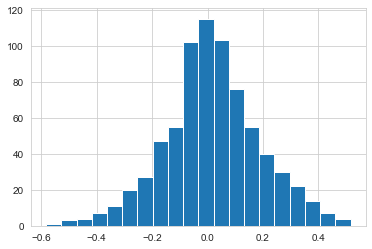

In [36]:
# Draw Histogram
plt.hist(df['corr'], 20)
plt.show()

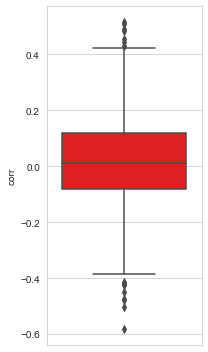

In [37]:
# Draw Boxplot
plt.subplots(1,1,figsize=(3,5))
sns.set_style('whitegrid')
sns.boxplot(df['corr'],color='red',orient='v')
plt.tight_layout()

## 2. Normalized Cross Correlation With Time Shift

In [38]:
def ccf(x, y, lag_max = 100):
    '''
    print(y - np.mean(y))
    print(x, np.mean(x))
    print(x - np.mean(x))
    print(np.std(y) * np.std(x) * len(y))
    '''
    result = ss.correlate(y - np.mean(y), x - np.mean(x), method='direct') / (np.std(y) * np.std(x) * len(y))
    length = (len(result) - 1) // 2
    lo = length - lag_max
    hi = length + (lag_max + 1)

    return result[lo:hi]

In [39]:
ncc_list = []
lag_list = []
lag = 10

for file in file_list:
    # Load File
    filepath= DATA_DIR + file
    df = pd.read_csv(filepath, index_col=0)

    
    # Scale
    df -= df.min()
    df /= df.max()
    
    # Calculate Normalized Cross Correlation With Different Time Shift(Lag=10)
    volumes = df['volume'].values
    ratio = df['ratio'].values
    ncc = ccf(volumes,ratio,lag_max=lag)
    
    # Find max index
    max_idx = np.argmax(abs(ncc))
    # Find max correlation
    max_ncc = ncc[max_idx]
    # Find max lag
    max_lag = max_idx - lag
    
    print(file, max_ncc, max_lag)
    ncc_list.append(max_ncc)
    lag_list.append(max_lag)

000020.csv -0.06261240924751048 -10
000040.csv 0.06636085078490954 -4
000060.csv -0.040223714515793006 10
000070.csv 0.03090367233896089 -9
000080.csv -0.047622266265260775 -6
000100.csv 0.04131593521401618 1
000120.csv 0.1739174174167558 9
000140.csv -0.07140401916092814 -9
000150.csv -0.08166998865319083 4
000210.csv 0.03806195628112307 5
000220.csv -0.025473462496661648 9
000230.csv -0.11840698285282562 -4
000240.csv -0.3199864880680362 -4
000270.csv 0.11089228636321503 5
000300.csv 0.09478899223524344 3
000320.csv -0.12363562044239482 -9
000370.csv -0.04333517947354522 0
000390.csv -0.05738263094427033 -5
000400.csv -0.04848292527597292 -6
000430.csv 0.04858212313803838 0
000480.csv 0.11350259269072491 -10
000490.csv 0.063093764411392 10
000500.csv 0.015994901975138625 -2
000520.csv -0.08705598868628542 10
000540.csv -0.04609854621835765 9
000590.csv 0.2191711009014791 -2
000640.csv 0.28947406702207296 1
000650.csv -0.06660176036289375 0
000660.csv 0.07479244095744415 5
000670.csv 

007070.csv -0.16467132945436708 3
007110.csv 0.09165818704596294 10
007120.csv 0.09089552224667895 5
007160.csv -0.05729223411688267 -7
007210.csv -0.09895422773358661 -3
007280.csv 0.04420733948140436 -10
007310.csv -0.05176120404376058 0
007340.csv -0.029215789109477322 -6
007460.csv -0.043227165781348144 9
007540.csv -0.03672896691271884 8
007570.csv -0.13747180826737612 -1
007590.csv 0.11111345539878707 -10
007610.csv -0.03239811847004948 -8
007630.csv -0.04593094270114381 4
007660.csv -0.11246266372800796 4
007690.csv 0.2604598941100866 -8
007700.csv 0.09685772746541178 4
007810.csv 0.08813718817957873 0
007860.csv 0.03580693629554611 -3
007980.csv -0.052889187528099305 9
008040.csv -0.033684862834983086 -10
008060.csv -0.1296282371524456 9
008110.csv -0.04068827697500805 4
008250.csv -0.025977389837001656 7
008260.csv -0.06076962494837452 -3
008350.csv 0.06979081560917665 9
008420.csv 0.14419369603236135 -10
008490.csv 0.15265661231478064 2
008500.csv 0.14736471962543174 -4
00856

034310.csv 0.07682893407754375 -9
034590.csv 0.03474314832407468 -10
034730.csv -0.059351790684382316 10
034830.csv 0.04445335070778819 10
035000.csv 0.12566671586313635 10
035150.csv 0.060894117850422445 -5
035250.csv -0.0903003804747465 8
035510.csv 0.24641946208333065 -4
035720.csv 0.2393115630830566 -9
036460.csv -0.058679604574150196 -4
036530.csv 0.08741783078888295 3
036570.csv 0.17402036432093893 5
036580.csv -0.06103698906978056 -4
037270.csv -0.05297288254268716 6
037560.csv -0.08286396378671634 7
037710.csv -0.041036043355819306 -3
039130.csv 0.06735745001886824 -3
039490.csv -0.08783417793721272 -6
039570.csv -0.054969772594088424 8
041650.csv 0.145833725643251 -9
042660.csv 0.05401711417984616 -10
042670.csv 0.07165934050869513 0
042700.csv -0.029153767139219307 3
044380.csv 0.041223769748815586 -9
044820.csv -0.09391240950628926 0
047040.csv -0.050586507734834904 10
047050.csv 0.1921450219298089 0
047400.csv -0.11087769839691464 -6
047810.csv 0.06694849643861714 -9
049770

In [40]:
# Convert To Dataframe
ncc_df = pd.DataFrame(list(zip(codes_list,ncc_list,lag_list)), columns=['code','ncc', 'lag'])
ncc_df = ncc_df.dropna()

# Save as CSV
ncc_df.to_csv(FILE_NCC, index=False)

In [41]:
# Visualize Results

# Load Correlation Data
ncc_loaded = pd.read_csv(FILE_NCC)
ncc_loaded.head()

,code,ncc,lag
0,20,-0.062612,-10
1,40,0.066361,-4
2,60,-0.040224,10
3,70,0.030904,-9
4,80,-0.047622,-6


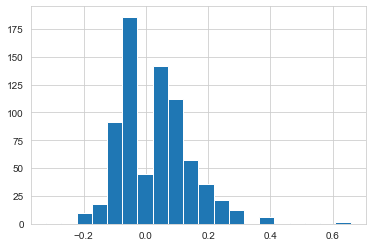

In [42]:
# Draw Histogram
plt.hist(ncc_loaded['ncc'], 20)
plt.show()

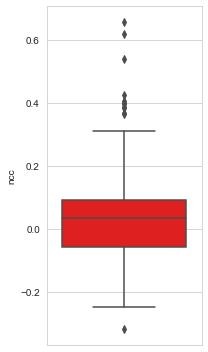

In [43]:
# Draw Boxplot
plt.subplots(1,1,figsize=(3,5))
sns.set_style('whitegrid')
sns.boxplot(ncc_loaded['ncc'],color='red',orient='v')
plt.tight_layout()

## 3. Using Percent Change Instead of Absolute

In [44]:
ncc_list = []
lag_list = []
lag = 10

for file in file_list:
    # Load File
    filepath= DATA_DIR + file
    df = pd.read_csv(filepath, index_col=0)
    df = df.pct_change()
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    df = df.abs()
    
    # Calculate Normalized Cross Correlation With Different Time Shift(Lag=10)
    volumes = df['volume'].values
    ratio = df['ratio'].values
    ncc = ccf(volumes,ratio,lag_max=lag)
    
    #print(ncc)
    # Find max index
    max_idx = np.argmax(abs(ncc))
    # Find max correlation
    max_ncc = ncc[max_idx]
    # Find max lag
    max_lag = max_idx - lag
    
    print(file, max_ncc, max_lag)
    ncc_list.append(max_ncc)
    lag_list.append(max_lag)

000020.csv -0.13959396568638283 1
000040.csv 0.13064728104893406 -2
000060.csv 0.0897802749422596 -3
000070.csv -0.10761638189352146 1
000080.csv -0.17059211710183875 -5
000100.csv -0.07514170384059499 1
000120.csv -0.05310551685545044 -5
000140.csv 0.05779776299301553 10
000150.csv -0.17120371875188725 1
000210.csv -0.09749335949233988 9
000220.csv 0.04460490404455587 -3
000230.csv -0.1156054900074658 1
000240.csv -0.1937329207595982 1
000270.csv -0.2477602344743899 1
000300.csv 0.11342177804423839 10
000320.csv -0.1803023959129885 1
000370.csv 0.061000826306957426 4
000390.csv 0.07846771180336656 7
000400.csv -0.029196554337693525 -6
000430.csv 0.05191820666055594 4
000480.csv -0.06875344544825478 1
000490.csv 0.07230897485607288 -4
000500.csv 0.03815492798799157 5
000520.csv -0.1073635859553432 8
000540.csv -0.0652980236722923 1
000590.csv -0.12905443768401914 1
000640.csv -0.16231931819512727 1
000650.csv 0.1407167841762885 8
000660.csv 0.19985795111648777 5
000670.csv 0.0949558853

007540.csv 0.053167360764514844 10
007570.csv -0.16505882029799368 1
007590.csv 0.07590682407416907 4
007610.csv 0.09668321293425317 -4
007630.csv 0.24359293067188578 -10
007660.csv -0.1233703928310302 -5
007690.csv -0.2119222415139924 1
007700.csv -0.16510171856342024 1
007810.csv 0.12022747491815922 0
007860.csv 0.07834993737380154 -3
007980.csv -0.13138498931992657 1
008040.csv 0.10690971350846226 -10
008060.csv 0.1794912326796392 4
008110.csv 0.04759088875026791 10
008250.csv -0.06119051904403263 1
008260.csv -0.06701844759979166 1
008350.csv 0.06732528946754626 -10
008420.csv 0.11026010798076774 -7
008490.csv -0.07107198631522098 1
008500.csv 0.12599924752754663 -4
008560.csv -0.15868851051152097 1
008600.csv 0.06497005837566079 4
008700.csv 0.12170733029862592 6
008730.csv 0.06830029069108316 4
008770.csv 0.2871524795634585 7
008870.csv -0.1003642766686571 1
008930.csv 0.08346139841197536 5
008970.csv -0.0835154292289607 9
009070.csv 0.09621549151668074 -9
009140.csv 0.0602681756

047810.csv -0.11075318941798824 1
049770.csv 0.12128336138659754 7
049800.csv 0.2938867554144931 -1
051600.csv -0.17263394215884412 1
051630.csv 0.06264090496421808 -8
051900.csv -0.2160125434584122 1
051910.csv -0.2101069343270541 1
052690.csv 0.05587120487064373 -3
053210.csv -0.18063459522818326 1
053690.csv 0.010734042947404963 -3
055490.csv -0.12750031649908347 1
055550.csv 0.20880762368998423 -2
057050.csv 0.13152962273852048 -3
058430.csv 0.1321170114031005 0
058650.csv 0.05463628489807554 3
058730.csv -0.09293388166972971 1
058850.csv 0.06217758223306717 4
058860.csv 0.11668091811738313 -9
060980.csv -0.1602100137004404 1
063160.csv -0.06458219780402973 1
064350.csv -0.08889701055193432 2
064960.csv 0.2499517093184486 5
066570.csv 0.07673890490770481 4
067830.csv 0.09630316147842452 6
068270.csv 0.5524811987467322 -1
068290.csv 0.15572901330897426 3
068400.csv 0.16738643839462972 4
069260.csv -0.09752924306948527 -5
069460.csv 0.11579580206166293 6
069620.csv -0.102816814572430

In [45]:
# Convert To Dataframe
ncc_pct_df = pd.DataFrame(list(zip(codes_list,ncc_list,lag_list)), columns=['code','ncc', 'lag'])
ncc_pct_df = ncc_pct_df.dropna()

# Save as CSV
ncc_pct_df.to_csv(FILE_PCT, index=False)

In [46]:
# Load Percentage Data
ncc_pct_loaded = pd.read_csv(FILE_PCT)
ncc_pct_loaded.head()

,code,ncc,lag
0,20,-0.139594,1
1,40,0.130647,-2
2,60,0.089780,-3
3,70,-0.107616,1
4,80,-0.170592,-5


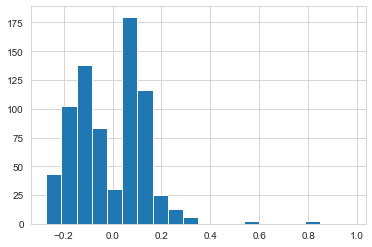

In [47]:
# Draw Histogram
plt.hist(ncc_pct_loaded['ncc'], 20)
plt.show()

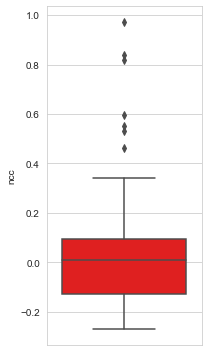

In [48]:
# Draw Boxplot
plt.subplots(1,1,figsize=(3,5))
sns.set_style('whitegrid')
sns.boxplot(ncc_pct_loaded['ncc'],color='red',orient='v')
plt.tight_layout()

In [21]:
ncc_pct_loaded[ncc_pct_loaded['ncc'] > 0.8]

,code,ncc,lag
630,103130,0.973152,-7
637,109070,0.820423,5
673,152550,0.837788,0
